In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace 'file.xlsx' with the path to your Excel file
excel_file = r'C:\Users\asus\OneDrive\Pictures\Iot lab\final_data.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Now you can work with the DataFrame 'df'
print(df.head())  # Print the first few rows of the DataFrame


                created_at  entry_id  moisture  humidity  temperature  relay
0  2024-05-09 06:38:53 UTC      1585        46      62.8         30.3      0
1  2024-05-09 06:39:09 UTC      1586        44      64.5         30.3      0
2  2024-05-09 06:39:25 UTC      1587         0      64.4         30.3      0
3  2024-05-09 06:39:40 UTC      1588        22      64.2         30.3      0
4  2024-05-09 06:39:56 UTC      1589        51      64.0         30.3      0


In [4]:
import pandas as pd

# # Load the Excel file into a DataFrame
# df = pd.read_excel("sample_data.xlsx")

# Define a function to determine the relay state based on moisture value
def determine_relay_state(moisture):
    if moisture >= 0 and moisture <= 35:
        return 1  # On
    else:
        return 0  # Off

# Apply the function to the 'moisture' column to generate the 'relay' column
df['relay'] = df['moisture'].apply(determine_relay_state)


In [5]:
df

,created_at,entry_id,moisture,humidity,temperature,relay
0,2024-05-09 06:38:53 UTC,1585,46,62.8,30.3,0
1,2024-05-09 06:39:09 UTC,1586,44,64.5,30.3,0
2,2024-05-09 06:39:25 UTC,1587,0,64.4,30.3,1
3,2024-05-09 06:39:40 UTC,1588,22,64.2,30.3,1
4,2024-05-09 06:39:56 UTC,1589,51,64.0,30.3,0
...,...,...,...,...,...,...
188,2024-05-09 09:33:59 UTC,2234,40,66.8,30.5,0
189,2024-05-09 09:34:14 UTC,2235,40,67.0,30.5,0
190,2024-05-09 09:34:30 UTC,2236,40,67.2,30.5,0
191,2024-05-09 09:34:45 UTC,2237,40,67.1,30.5,0


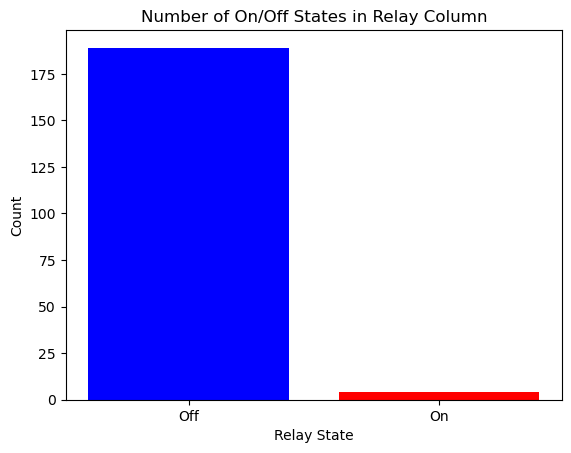

In [8]:
# Visualize the number of on/off states in the 'relay' column
relay_counts = df['relay'].value_counts()
plt.bar(relay_counts.index, relay_counts.values, color=['blue', 'red'])
plt.xlabel('Relay State')
plt.ylabel('Count')
plt.xticks([0, 1], ['Off', 'On'])
plt.title('Number of On/Off States in Relay Column')
plt.show()

Summary Statistics:
          entry_id    moisture    humidity  temperature       relay
count   193.000000  193.000000  193.000000   193.000000  193.000000
mean   1909.316062   43.523316   64.311399    30.181865    0.020725
std     215.253868    4.649230    4.856061     2.192110    0.142834
min    1585.000000    0.000000    0.000000     0.000000    0.000000
25%    1731.000000   42.000000   63.600000    30.100000    0.000000
50%    1921.000000   45.000000   64.200000    30.400000    0.000000
75%    2190.000000   45.000000   65.600000    30.500000    0.000000
max    2238.000000   57.000000   70.800000    30.700000    1.000000


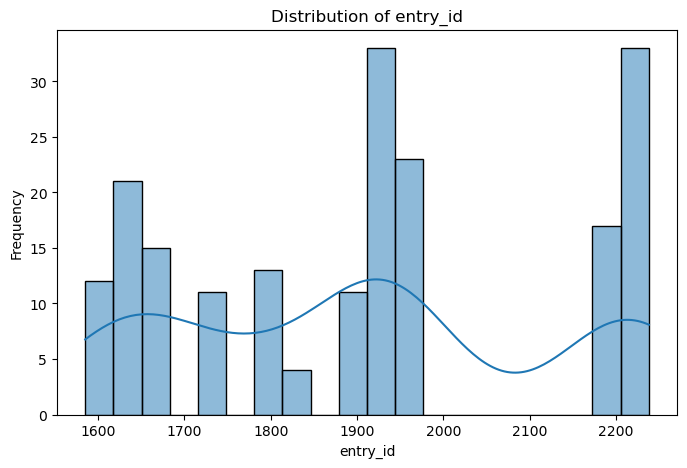

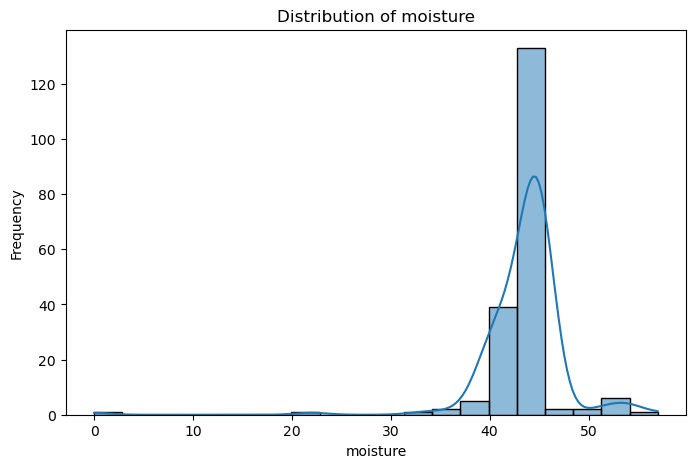

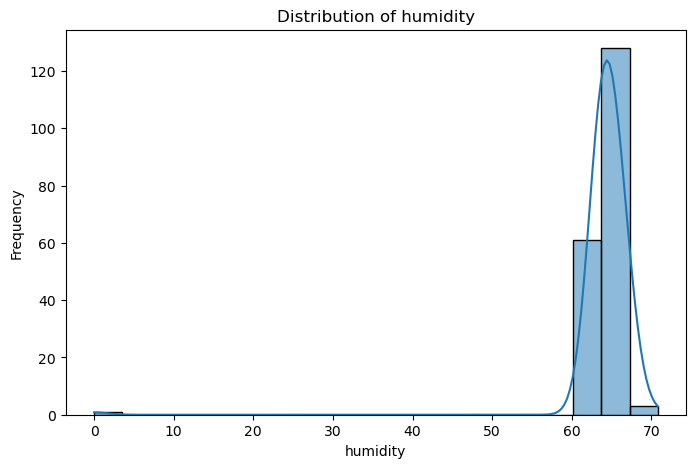

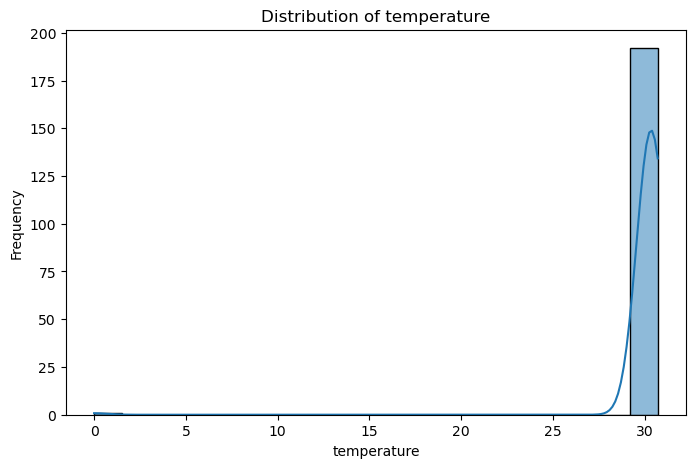

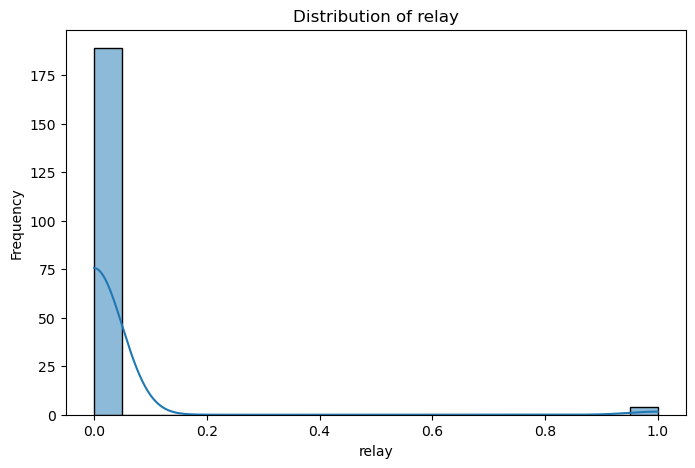

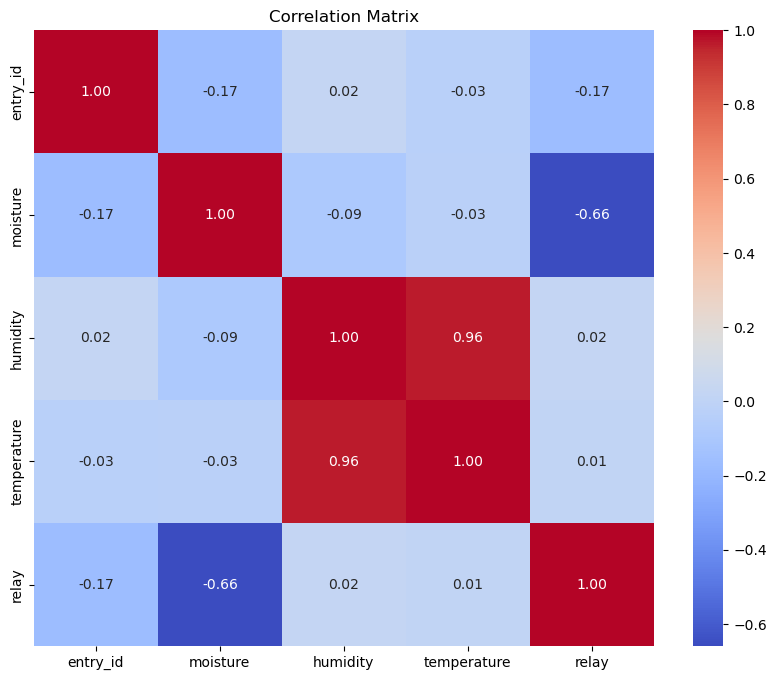

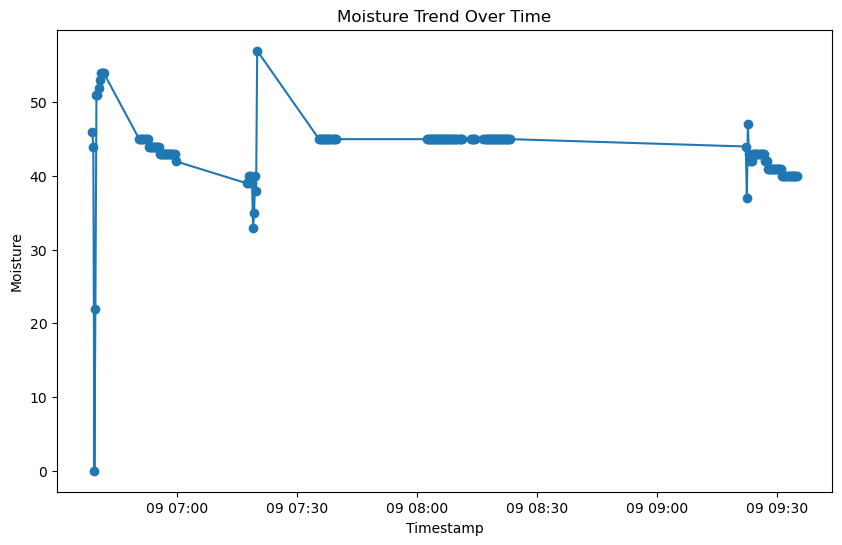

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# 2. Data Distribution
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 3. Correlation Analysis (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Time Series Analysis
df['created_at'] = pd.to_datetime(df['created_at'])
plt.figure(figsize=(10, 6))
plt.plot(df['created_at'], df['moisture'], marker='o', linestyle='-')
plt.title('Moisture Trend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Moisture')
plt.show()
